# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

In [1]:
%%capture
pip install geopandas

In [2]:
import numpy as np

In [3]:
import pandas as pd
import geopandas as gpd

denver = pd.read_csv('./data/denver.csv')
denver_gpd = gpd.read_file('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [4]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [5]:
census = pd.read_csv('./data/census.csv')
census['NBHD_ID'] = census['NBHD_ID'].astype(int)
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


## ☕ Exploring Starbucks data
Let's take a look at the Starbucks points across Denver - even though they are not to be considered a competition, maybe something interesting can be found.

In [6]:
denver_gpd['geometry'] = gpd.points_from_xy(denver_gpd['Longitude'], denver_gpd['Latitude'])
denver_gpd

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude,geometry
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,,,80204,-105.01,39.75,POINT (-105.01000 39.75000)
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,,,802023940,-104.99,39.75,POINT (-104.99000 39.75000)
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,,,802104528,-104.97,39.68,POINT (-104.97000 39.68000)
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,,,80211,-105.02,39.76,POINT (-105.02000 39.76000)
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,,,802122001,-105.05,39.77,POINT (-105.05000 39.77000)
...,...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,,,802022349,-105.0,39.75,POINT (-105.00000 39.75000)
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,,,802382699,-104.9,39.76,POINT (-104.90000 39.76000)
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,,,802181202,-104.97,39.74,POINT (-104.97000 39.74000)
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,,,802227605,-104.91,39.65,POINT (-104.91000 39.65000)


<AxesSubplot:>

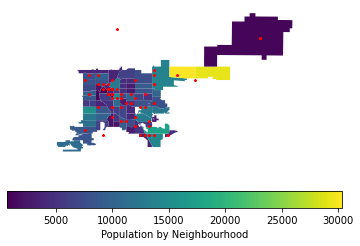

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.axis('off')
ax.set_aspect('equal')

neighborhoods.merge(census, on='NBHD_ID')[['geometry', 'POPULATION_2010']].plot(ax = ax, column='POPULATION_2010', cmap = 'viridis', legend=True, legend_kwds={'label': "Population by Neighbourhood",
                        'orientation': "horizontal"})

denver_gpd.plot(ax = ax, marker='*', color='red', markersize=5)

## 🔍 Exploring census data - demographic distribution
Firstly, I want to explore the distribution of the population between 18 and 35 years old, as well as distribution of the households with over 100K USD of income. This will give me a general sense of data and what number I could potentially expect from the neighbourhoods when I'm estimating potential customers.

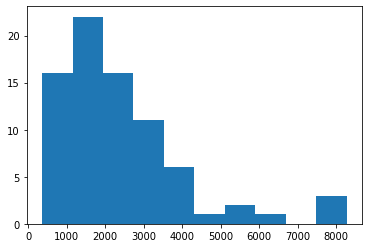

In [8]:
plt.hist(census['AGE_18_TO_34'])
plt.show()

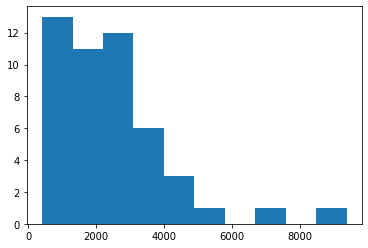

In [9]:
census['people_per_household'] = census['POPULATION_2010']/census['NUM_HOUSEHOLDS']
census['population_100K'] = census['NUM_HHLD_100K+']*census['people_per_household']
plt.hist(census['population_100K'])
plt.show()

## 📊 Defining our metrics
We will be looking at our key metrics and figuring out, where we can find our largest potential client base. I will firstly look at them independently, assign ranks to them based on the number of the potential client base, sum them and create another ranking based off of these ranks. 

In [10]:
census_geometry = census.merge(neighborhoods, on = 'NBHD_ID')
census_geometry = gpd.GeoDataFrame(census_geometry)
census_geometry['ages_18_to_34_ratio'] = census_geometry['AGE_18_TO_34']/census_geometry['POPULATION_2010']
census_geometry = census_geometry.sort_values(by='AGE_18_TO_34', ascending=False)
census_geometry['ages_pop_row_number'] = census_geometry['AGE_18_TO_34'].rank()
census_geometry[['NBHD_NAME_x', 'AGE_18_TO_34', 'ages_18_to_34_ratio', 'ages_pop_row_number']]

,NBHD_NAME_x,AGE_18_TO_34,ages_18_to_34_ratio,ages_pop_row_number
8,Capitol Hill,8274.0,0.562551,78.0
27,Gateway - Green Valley Ranch,7778.0,0.266361,77.0
44,Montbello,7742.0,0.255107,76.0
25,Five Points,5961.0,0.468927,75.0
63,University,5784.0,0.616960,74.0
...,...,...,...,...
6,Belcaro,621.0,0.148849,5.0
22,DIA,462.0,0.396567,4.0
21,Country Club,414.0,0.137954,3.0
72,Wellshire,370.0,0.118098,2.0


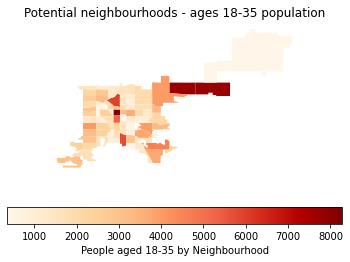

In [11]:
fig_ages, ax_ages = plt.subplots()
plt.axis('off')
ax_ages.set_aspect('equal')

census_geometry[['geometry','AGE_18_TO_34']].plot(ax = ax_ages, column='AGE_18_TO_34', cmap='OrRd', legend=True, legend_kwds={'label': "People aged 18-35 by Neighbourhood",
                        'orientation': "horizontal"})
plt.title('Potential neighbourhoods - ages 18-35 population')
plt.show()

In [12]:
census_geometry['population_100K_ratio'] = census_geometry['population_100K']/census_geometry['POPULATION_2010']
census_geometry = census_geometry.sort_values(by='population_100K', ascending=False)
census_geometry['100K_pop_row_number'] = census_geometry['population_100K'].rank(na_option='top')
census_geometry[['NBHD_NAME_x', 'population_100K', 'population_100K_ratio', '100K_pop_row_number']]

,NBHD_NAME_x,population_100K,population_100K_ratio,100K_pop_row_number
59,Central Park,9366.838710,0.671554,78.0
27,Gateway - Green Valley Ranch,6789.921714,0.232524,77.0
36,Hilltop,5108.158439,0.623707,76.0
56,South Park Hill,4316.169904,0.502464,75.0
32,Hampden South,4281.438630,0.297943,74.0
...,...,...,...,...
6,Belcaro,NaN,NaN,15.5
22,DIA,NaN,NaN,15.5
21,Country Club,NaN,NaN,15.5
72,Wellshire,NaN,NaN,15.5


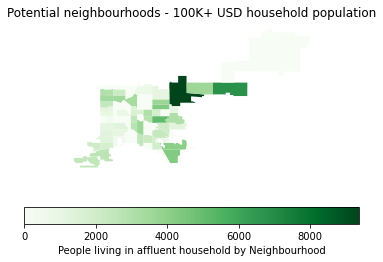

In [13]:
fig_100K, ax_100K = plt.subplots()
plt.axis('off')
ax_100K.set_aspect('equal')

census_geometry[['geometry','population_100K']].fillna(0).plot(ax = ax_100K, column='population_100K', cmap='Greens', legend=True, legend_kwds={'label': "People living in affluent household by Neighbourhood",
                        'orientation': "horizontal"})
plt.title('Potential neighbourhoods - 100K+ USD household population')
plt.show()

## 🌟 Summing it up
The final step is to prepare our insights into useful visualizations. I will pick top 10 neighbourhoods based on the rank and pull the most important information - population of the specific demographics (ages 18-35, people from affluent households), the ratios to total population of these demographics (to better visualize how the neighbourhood looks like overall), highest possible customers base (minimal number of either of the demographics) and the rank (based on their ranks from the demographics ranking).

NOTE: I believe that choosing the best neighbourhood based on rank rather than highest possible customers base is a bit more reliable, since that means that the neighbourhood was more consistent among both of relevant metrics. Also, it is the most optimistic outcome and it's only tracking the potential of the neighbourhood.

In [14]:
census_geometry['highest_possible_customers_number'] = census_geometry[['population_100K','AGE_18_TO_34']].fillna(0).min(axis=1).astype(int)
census_geometry['score'] = census_geometry['ages_pop_row_number'] + census_geometry['100K_pop_row_number']
census_geometry['rank'] = census_geometry['score'].rank(ascending=False)
census_geometry[['NBHD_NAME_x', 'highest_possible_customers_number', 'rank']].sort_values(by='highest_possible_customers_number', ascending=False)

,NBHD_NAME_x,highest_possible_customers_number,rank
27,Gateway - Green Valley Ranch,6789,1.0
31,Hampden,4066,4.0
59,Central Park,4008,2.0
32,Hampden South,3729,6.0
44,Montbello,3588,3.0
...,...,...,...
2,Baker,0,52.0
14,City Park West,0,51.0
39,Kennedy,0,49.0
9,CBD,0,48.0


In [15]:
census_geometry_summary = census_geometry[['NBHD_ID', 'NBHD_NAME_x', 'geometry' ,'POPULATION_2010', 'AGE_18_TO_34', 'population_100K', 'ages_18_to_34_ratio', 'population_100K_ratio', 'highest_possible_customers_number', 'rank']]
census_geometry_summary = census_geometry_summary.sort_values(by='rank')
census_geometry_summary[:10]

,NBHD_ID,NBHD_NAME_x,geometry,POPULATION_2010,AGE_18_TO_34,population_100K,ages_18_to_34_ratio,population_100K_ratio,highest_possible_customers_number,rank
27,28,Gateway - Green Valley Ranch,"POLYGON ((-104.80990 39.77283, -104.80988 39.7...",29201.0,7778.0,6789.921714,0.266361,0.232524,6789,1.0
59,60,Central Park,"POLYGON ((-104.86604 39.79841, -104.86604 39.7...",13948.0,4008.0,9366.838710,0.287353,0.671554,4008,2.0
44,45,Montbello,"POLYGON ((-104.80990 39.77283, -104.81925 39.7...",30348.0,7742.0,3588.110300,0.255107,0.118232,3588,3.0
31,32,Hampden,"POLYGON ((-104.86602 39.66027, -104.86633 39.6...",17547.0,4655.0,4066.686695,0.265288,0.231760,4066,4.0
25,26,Five Points,"POLYGON ((-104.97192 39.77030, -104.97335 39.7...",12712.0,5961.0,3333.774586,0.468927,0.262254,3333,5.0
32,33,Hampden South,"POLYGON ((-104.90205 39.62443, -104.90237 39.6...",14370.0,3729.0,4281.438630,0.259499,0.297943,3729,6.0
58,59,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",10954.0,5361.0,2522.539430,0.489410,0.230285,2522,7.0
63,64,University,"POLYGON ((-104.95945 39.68473, -104.95945 39.6...",9375.0,5784.0,2471.568236,0.616960,0.263634,2471,8.5
35,36,Highland,"POLYGON ((-104.99820 39.76930, -104.99821 39.7...",8429.0,3269.0,3476.885984,0.387828,0.412491,3269,8.5
19,20,Congress Park,"POLYGON ((-104.94066 39.74013, -104.94066 39.7...",10235.0,3614.0,3003.983229,0.353102,0.293501,3003,10.0


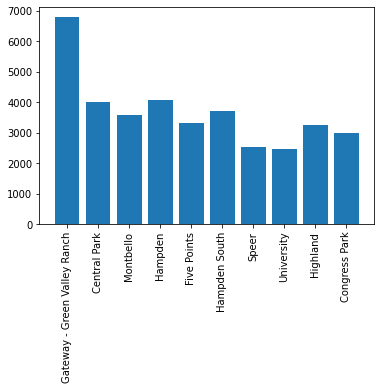

In [16]:
fig, ax = plt.subplots()
ax.bar(census_geometry_summary[:10]['NBHD_NAME_x'], census_geometry_summary[:10]['highest_possible_customers_number'])
plt.xticks(rotation='vertical')
plt.show()

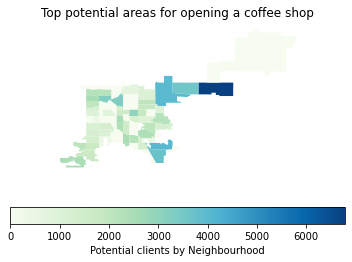

In [17]:
fig, ax = plt.subplots()
plt.axis('off')
ax.set_aspect('equal')

census_geometry_summary[['geometry','highest_possible_customers_number']].plot(ax = ax, column='highest_possible_customers_number', cmap='GnBu', legend=True, legend_kwds={'label': "Potential clients by Neighbourhood",
                        'orientation': "horizontal"})
plt.title('Top potential areas for opening a coffee shop')
plt.show()

## 🏆 And the winners are...

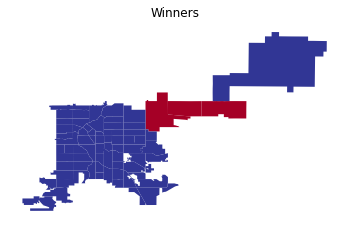

27    Gateway - Green Valley Ranch
59                    Central Park
44                       Montbello
Name: NBHD_NAME_x, dtype: object


In [19]:
fig, ax = plt.subplots()
plt.axis('off')
ax.set_aspect('equal')

census_geometry_summary['winner'] = 0
census_geometry_summary.loc[census_geometry_summary['rank'] > 3, 'winner'] = 1
census_geometry_summary[['geometry','winner']].plot(ax = ax, column='winner', cmap='RdYlBu')

plt.title('Winners')
plt.show()
print(census_geometry_summary.iloc[:3,1])